In [1]:
import numpy as np
import scipy.optimize as opt
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [24]:
V_o=np.array([4.06, 4.04, 4.00, 3.90, 3.86, 3.86, 3.86])
V_c=np.array([4.06, 3.88, 3.42, 1.20, 0.624, 0.133, 0.072])
freq=np.array([10, 50, 100, 500, 1000, 5000, 10000])
Vc_Vo = V_c / V_o


In [25]:
def fit_model(x, A, tau):
    denom = (1 + x ** 2 * tau ** 2) ** 0.5
    return A / denom


In [32]:
start_pars = [69, 1]

pars, cov = opt.curve_fit(fit_model, freq, Vo_Vc, p0=start_pars)

pars


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

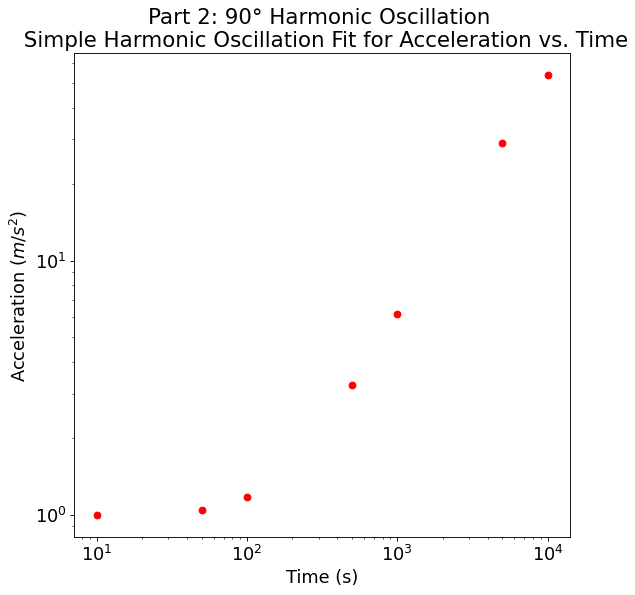

In [14]:
# Best-fit plots

# Sets figure size etc.
fig1=plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': '16'})

# Data and fit
plt.loglog(freq, Vo_Vc, 'ro')

# Axes label and title
plt.title("Part 2: 90° Harmonic Oscillation \n Simple Harmonic Oscillation Fit for Acceleration vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration $(m/s^2)$")
# plt.legend(loc='upper right', prop={'size': 13})
plt.show()